Exercicio - Limpeza e Tratamento de Dados em Linguagem Python (Jupyter)

In [1]:
import pandas as pd
import seaborn as sb
import statistics as sts

In [2]:
dataset = pd.read_csv("tempo_python.csv", sep=";")
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


Análise Exploratória

In [3]:
agrupado_aparencia = dataset.groupby(['Aparencia']).size()
agrupado_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

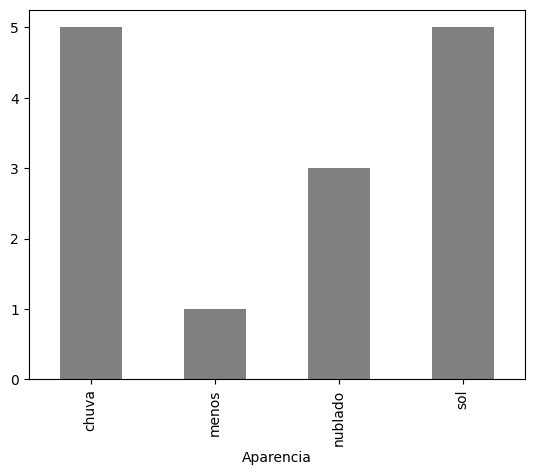

In [4]:
agrupado_aparencia.plot.bar(color='gray')

In [5]:
agrupado_vento = dataset.groupby(['Vento']).size()
agrupado_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

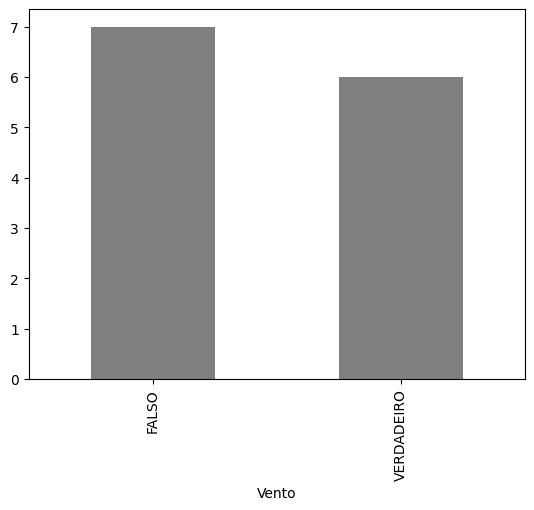

In [6]:
agrupado_vento.plot.bar(color='gray')

In [7]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

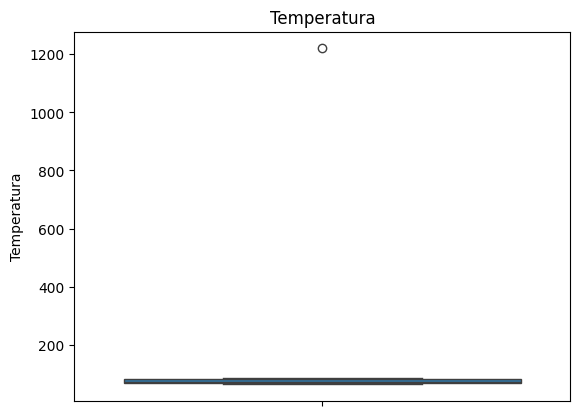

In [8]:
sb.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

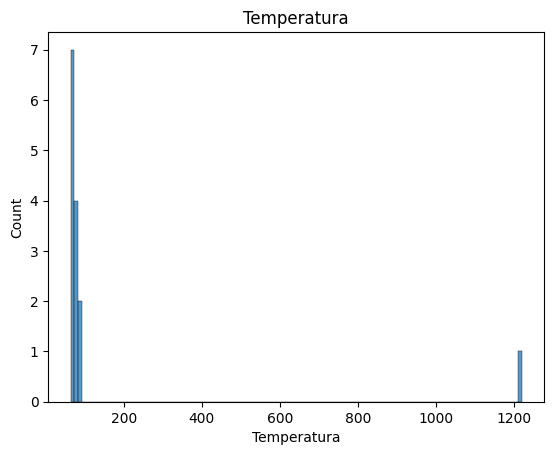

In [9]:
sb.histplot(dataset['Temperatura']).set_title('Temperatura')

In [10]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

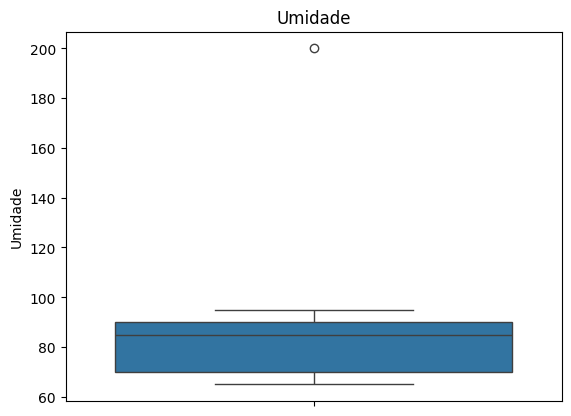

In [11]:
sb.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

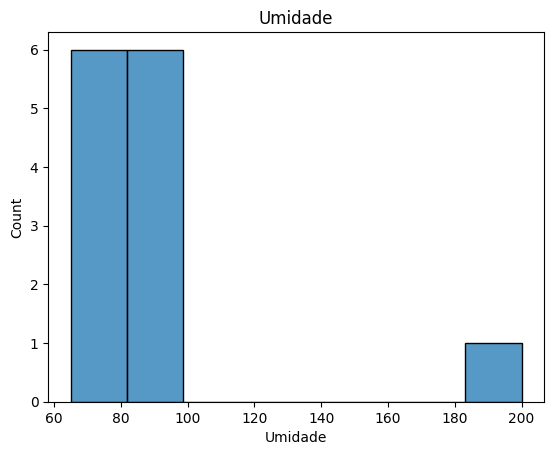

In [12]:
sb.histplot(dataset['Umidade']).set_title('Umidade')

In [13]:
#Verificando valores NaN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Limpeza e Tratamento de Dados

In [14]:
#Transformando menos em sol
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupado_aparencia = dataset.groupby(['Aparencia']).size()
agrupado_aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [15]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [16]:
#Verificando anomalias em temperatura
dataset.loc[(dataset['Temperatura'] < -135) | (dataset['Temperatura'] > 130), 'Temperatura']

7    1220
Name: Temperatura, dtype: int64

In [17]:
#Calculando Mediana
mediana_temperatura = sts.median(dataset['Temperatura'])
mediana_temperatura

73.5

In [18]:
#Substituindo
dataset.loc[(dataset['Temperatura'] < -135) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana_temperatura

C:\Users\ouropreto\AppData\Local\Temp\ipykernel_12832\3757505802.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] < -135) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana_temperatura


In [19]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,200.0,NaN,sim


In [21]:
#Verificando NaN
dataset['Umidade'].isnull().sum()

np.int64(1)

In [22]:
#Calculando Mediana
mediana_umidade = sts.median(dataset['Umidade'])
mediana_umidade

85.5

In [24]:
#Verificando anomalias de Umidade
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade']

9    200.0
Name: Umidade, dtype: float64

In [25]:
#Substituindo NaN pela Mediana
dataset.fillna({'Umidade': mediana_umidade},inplace=True)

In [26]:
#Substituindo anomalia pela Mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana_umidade

In [27]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,NaN,sim


In [28]:
#Corrigindo vento - Substituindo valor de NaN por Moda
dataset.fillna({'Vento': 'FALSO'},inplace=True)

In [29]:
#Verificando base de dados final
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
